In [95]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
data= loadmat('data.mat')

In [96]:
X=data['X']
y=data['y']
Xval=data['Xval']
yval=data['yval']
Xtest=data['Xtest']
ytest=data['ytest']

theta=np.ones([2,1])

In [328]:
def costFunction(X, y, theta, Lambda):
    m= len(y)
    J= 0
        
#    x = np.stack([np.ones([X.shape[0],1]), X], axis=1)
    h=np.array(np.dot(np.matrix(X),theta))
    
    theta_reg=np.vstack((np.zeros([1,1]), theta[1:]))
    
    J=(1/(2*m))*((h-y)**2).sum()+(Lambda/(2*m))*(theta_reg**2).sum()
    
    grad = (1/m)*(np.dot(X.transpose(),(h-y)))+ (Lambda/m)*theta_reg
    
    return [J, grad]


def train(X, y, Lambda):
    Theta = np.zeros([X.shape[1],1]) #initial theta

    grad=np.zeros([X.shape[1],1])
 
    for epoch in range(1,100001):
        [J, grad] = costFunction(X, y, Theta, Lambda)
        Theta=Theta-lr*grad

        if(epoch%10000==0):
            print("epoch:", epoch, "cost:", J)
            print("theta:", Theta)
        
    return Theta

def forward(X, theta):
    return np.dot(X, theta)

In [314]:
theta

array([[1.],
       [1.]])

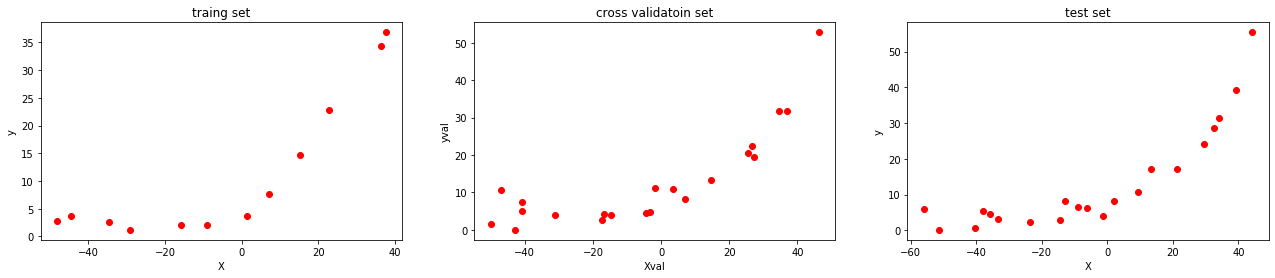

In [98]:
f, ax = subplots(1,3,figsize=(22,4))

ax[0].plot(X, y, 'or')
ax[0].set_title('traing set')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')

ax[1].plot(Xval, yval, 'or')
ax[1].set_title('cross validatoin set')
ax[1].set_xlabel('Xval')
ax[1].set_ylabel('yval')

ax[2].plot(Xtest, ytest, 'or')
ax[2].set_title('test set')
ax[2].set_xlabel('X')
ax[2].set_ylabel('y')

plt.show()

In [240]:
x=np.append(np.ones((X.shape[0],1)),X, 1)
xval=np.append(np.ones((Xval.shape[0],1)),Xval, 1)
xtest=np.append(np.ones((Xtest.shape[0],1)),Xtest, 1)

lr=0.002
a=train(x, y, 1)

epoch: 1000 cost: 24.098354140420703
theta: [[11.2083809 ]
 [ 0.35647195]]
epoch: 2000 cost: 22.41497363327665
theta: [[12.81788664]
 [ 0.36612389]]
epoch: 3000 cost: 22.380272218673962
theta: [[13.04897335]
 [ 0.36750967]]
epoch: 4000 cost: 22.37955687940853
theta: [[13.0821519 ]
 [ 0.36770864]]
epoch: 5000 cost: 22.379542133316168
theta: [[13.08691555]
 [ 0.36773721]]
epoch: 6000 cost: 22.37954182933839
theta: [[13.0875995 ]
 [ 0.36774131]]
epoch: 7000 cost: 22.379541823072156
theta: [[13.0876977]
 [ 0.3677419]]
epoch: 8000 cost: 22.37954182294298
theta: [[13.0877118 ]
 [ 0.36774198]]
epoch: 9000 cost: 22.37954182294032
theta: [[13.08771382]
 [ 0.36774199]]
epoch: 10000 cost: 22.37954182294026
theta: [[13.08771411]
 [ 0.367742  ]]
epoch: 11000 cost: 22.379541822940265
theta: [[13.08771415]
 [ 0.367742  ]]
epoch: 12000 cost: 22.37954182294027
theta: [[13.08771416]
 [ 0.367742  ]]
epoch: 13000 cost: 22.379541822940265
theta: [[13.08771416]
 [ 0.367742  ]]
epoch: 14000 cost: 22.37954182

In [100]:
a

array([[11.35281291],
       [ 0.35733808]])

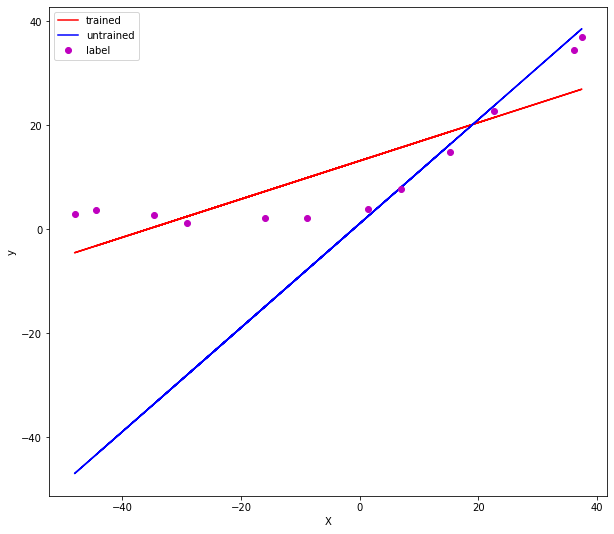

In [241]:
plt.figure(figsize=(10,9))
p1=plt.plot(X, forward(x, a), 'r', label='trained')
p2=plt.plot(X, forward(x, theta), 'b', label='untrained')
p3=plt.plot(X, y, 'om', label='label')

plt.legend()

plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [102]:
print("[before training]")
print("train error =", costFunction(x, y, theta, 0)[0])
print("cross validation error =", costFunction(xval, yval,theta, 0)[0])
print("test error =", costFunction(xtest, ytest, theta, 0)[0])
print('\n')

print("train error =", costFunction(x, y, a, 0)[0])
print("cross validation error =", costFunction(xval, yval,a, 0)[0])
print("test error =", costFunction(xtest, ytest, a, 0)[0])

[before training]
train error = 303.9515255535976
cross validation error = 344.65081501026566
test error = 342.3791418315095


train error = 23.83331966330838
cross validation error = 33.028936603328994
test error = 37.66770389724085


# overfitting (8차 다항식 가설)

In [371]:
x_poly=x
degree=8
for i in range(2,degree+1):
    x_poly=np.c_[x_poly, x[:,1]**i]
theta_poly=np.ones([x_poly.shape[1], 1])

In [378]:

lr=2e-26  #8차
#lr=1e-10 #3차
#lr=2e-40 #12차
#lr=1.5e-83 #26차
trained_theta_poly=train(x_poly, y, 0)

epoch: 100000 cost: 36.54094270875386
theta: [[1.16066169e-20]
 [1.31307326e-19]
 [6.07007745e-18]
 [8.17986042e-17]
 [4.89630453e-15]
 [1.02903303e-13]
 [3.72529122e-12]
 [2.06854972e-10]
 [4.52899807e-12]]
epoch: 200000 cost: 36.537341226976196
theta: [[2.22855569e-20]
 [2.04879802e-19]
 [1.10141285e-17]
 [7.90924659e-17]
 [8.55358806e-15]
 [7.67371686e-14]
 [6.40869156e-12]
 [2.06862402e-10]
 [4.52792014e-12]]
epoch: 300000 cost: 36.533743421896844
theta: [[3.29635062e-20]
 [2.78465954e-19]
 [1.59570469e-17]
 [7.63993542e-17]
 [1.22096208e-14]
 [5.05770434e-14]
 [9.09099081e-12]
 [2.06848956e-10]
 [4.52642227e-12]]
epoch: 400000 cost: 36.5301482875528
theta: [[4.36405587e-20]
 [3.52071604e-19]
 [2.08989465e-17]
 [7.37277930e-17]
 [1.58645282e-14]
 [2.44359508e-14]
 [1.17722944e-11]
 [2.06835512e-10]
 [4.52492493e-12]]
epoch: 500000 cost: 36.52655582196131
theta: [[ 5.43167148e-20]
 [ 4.25696746e-19]
 [ 2.58398277e-17]
 [ 7.10777752e-17]
 [ 1.95183107e-14]
 [-1.68611494e-15]
 [ 1.445

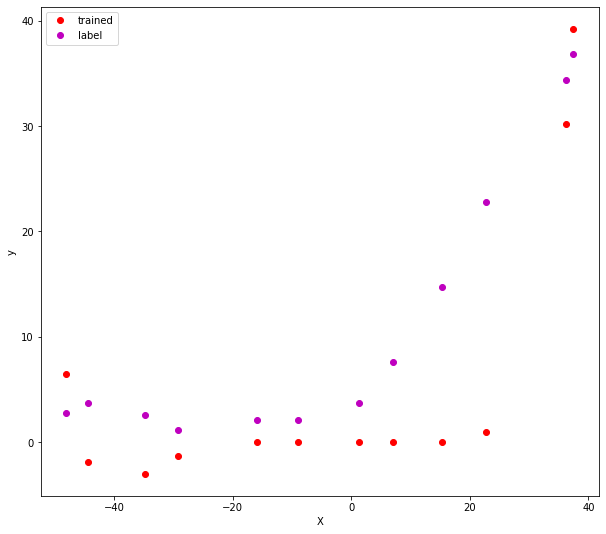

In [379]:
plt.figure(figsize=(10,9))
p1=plt.plot(X, forward(x_poly, trained_theta_poly), 'or', label='trained')
p3=plt.plot(X, y, 'om', label='label')

plt.legend()

plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [381]:
testX=np.zeros([80,1])
for i in range(80):
    testX[i]=i-40
    
testX=np.append(np.ones((testX.shape[0],1)),testX, 1)

In [382]:
testX_poly=testX
for i in range(2,degree+1):
    testX_poly=np.c_[testX_poly, testX[:,1]**i]

<Figure size 3600x3600 with 0 Axes>

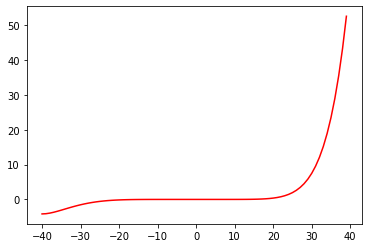

<Figure size 3600x3600 with 0 Axes>

In [383]:
plt.plot(testX[:,1], forward(testX_poly, trained_theta_poly), 'r', label='trained')
plt.figure(figsize=(50,50))